# Анализ результатов измерений по ТП Лесная за 2020 год

In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns
plt.style.use('seaborn')

### Загрузка данных

In [131]:
fks_2_data_path =  'I:/Результаты_замеров_ТП_Лесная_Ф1_и_Ф2_2021/ФКС_2_2020_исследование_нагрузки.csv'

In [132]:
fks_2 = pd.read_csv(fks_2_data_path, sep=';', skiprows=10)
fks_2.head()

,Unnamed: 0,Unnamed: 1,'О','P','Г','Т','A',дата,Время (UTC+0),U L1 макс [kВ],I L1 макс [A],THD U L1 макс [%],THD I L1 макс [%],cos(φ) L1 макс [---]
0,NaN,NaN,'О',,'Г',,,2020-09-08,07:50:14.767,"13,677","144,75","5,37","36,08","0,90"
1,NaN,NaN,'О',,'Г',,,2020-09-08,07:50:15.767,"13,679","147,95","5,47","35,39","0,90"
2,NaN,NaN,'О',,'Г',,,2020-09-08,07:50:16.767,"13,696","147,56","5,43","35,32","0,91"
3,NaN,NaN,'О',,'Г',,,2020-09-08,07:50:17.767,"13,720","150,29","5,35","35,22","0,91"
4,NaN,NaN,'О',,'Г',,,2020-09-08,07:50:18.767,"13,723","145,15","5,38","34,20","0,90"


### Предварительная обработка данных

#### Удалим не нужные столбцы

In [133]:
fks_2.drop( columns=['Unnamed: 0',
                     'Unnamed: 1',
                     "'О'",
                     "'P'",
                     "'Г'",
                     "'Т'",
                     "'A'"], inplace= True)
fks_2.head()

,дата,Время (UTC+0),U L1 макс [kВ],I L1 макс [A],THD U L1 макс [%],THD I L1 макс [%],cos(φ) L1 макс [---]
0,2020-09-08,07:50:14.767,"13,677","144,75","5,37","36,08","0,90"
1,2020-09-08,07:50:15.767,"13,679","147,95","5,47","35,39","0,90"
2,2020-09-08,07:50:16.767,"13,696","147,56","5,43","35,32","0,91"
3,2020-09-08,07:50:17.767,"13,720","150,29","5,35","35,22","0,91"
4,2020-09-08,07:50:18.767,"13,723","145,15","5,38","34,20","0,90"


#### Переименуем название столбцов

In [134]:
columns_name = {'дата      ': 'date',
                'Время (UTC+0)': 'time',
                'U L1 макс [kВ]': 'voltage',
                'I L1 макс [A]': 'current',
                'THD U L1 макс [%]': 'THD_U',
                'THD I L1 макс [%]': 'THD_I',
                'cos(φ) L1 макс [---]': 'cos(φ)'}

In [135]:
fks_2 = fks_2.rename(columns = columns_name)
fks_2.head()

,date,time,voltage,current,THD_U,THD_I,cos(φ)
0,2020-09-08,07:50:14.767,"13,677","144,75","5,37","36,08","0,90"
1,2020-09-08,07:50:15.767,"13,679","147,95","5,47","35,39","0,90"
2,2020-09-08,07:50:16.767,"13,696","147,56","5,43","35,32","0,91"
3,2020-09-08,07:50:17.767,"13,720","150,29","5,35","35,22","0,91"
4,2020-09-08,07:50:18.767,"13,723","145,15","5,38","34,20","0,90"


#### Конвертируем дату и время

In [136]:
fks_2['date'] = pd.to_datetime(fks_2['date'])
fks_2['time'] = pd.to_datetime(fks_2['time']).dt.time
fks_2.head()

,date,time,voltage,current,THD_U,THD_I,cos(φ)
0,2020-09-08,07:50:14.767000,"13,677","144,75","5,37","36,08","0,90"
1,2020-09-08,07:50:15.767000,"13,679","147,95","5,47","35,39","0,90"
2,2020-09-08,07:50:16.767000,"13,696","147,56","5,43","35,32","0,91"
3,2020-09-08,07:50:17.767000,"13,720","150,29","5,35","35,22","0,91"
4,2020-09-08,07:50:18.767000,"13,723","145,15","5,38","34,20","0,90"


In [137]:
fks_2 = fks_2.set_index('time')

#### Конвертируем остальные переменные в числовые значения

In [138]:
# Удаление пробелов
fks_2.iloc[: ,-5:] = fks_2.iloc[: ,-5:].apply(lambda x : x.str.strip())

# Замена запятой на  точку
fks_2.iloc[: ,-5:] = fks_2.iloc[: ,-5:].apply(lambda x: x.str.replace(',','.'))

# Изменение типа данных на численные
fks_2.iloc[: ,-5:] = fks_2.iloc[: ,-5:].astype(float)

fks_2.head()

,date,voltage,current,THD_U,THD_I,cos(φ)
time,,,,,,
07:50:14.767000,2020-09-08,13.677,144.75,5.37,36.08,0.90
07:50:15.767000,2020-09-08,13.679,147.95,5.47,35.39,0.90
07:50:16.767000,2020-09-08,13.696,147.56,5.43,35.32,0.91
07:50:17.767000,2020-09-08,13.720,150.29,5.35,35.22,0.91
07:50:18.767000,2020-09-08,13.723,145.15,5.38,34.20,0.90


#### Пересчетаем значение напряжения

In [139]:
fks_2['voltage'] = fks_2['voltage']*np.sqrt(3)*1000
fks_2['voltage'][:5]

time
07:50:14.767000    23689.258895
07:50:15.767000    23692.722997
07:50:16.767000    23722.167860
07:50:17.767000    23763.737080
07:50:18.767000    23768.933232
Name: voltage, dtype: float64

#### Возьмем модуль cos(φ)

In [140]:
fks_2['cos(φ)'] = np.absolute(fks_2['cos(φ)'])
fks_2['cos(φ)'][:5]

time
07:50:14.767000    0.90
07:50:15.767000    0.90
07:50:16.767000    0.91
07:50:17.767000    0.91
07:50:18.767000    0.90
Name: cos(φ), dtype: float64

## Анализ результатов измерений

### Распределение значений переменных во времени

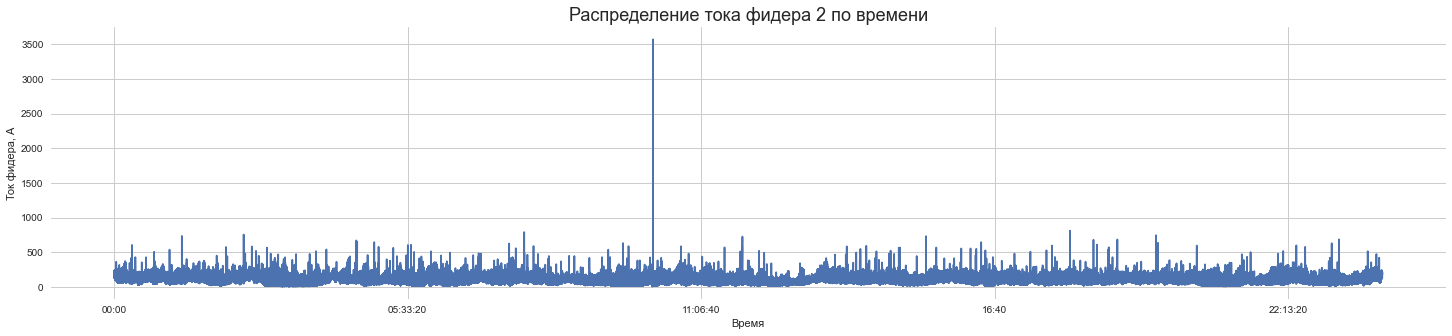

In [141]:
sns.set_style("whitegrid")
fks_2['current'].plot(figsize=(25, 5))
plt.title("Распределение тока фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Ток фидера, А')
plt.show()

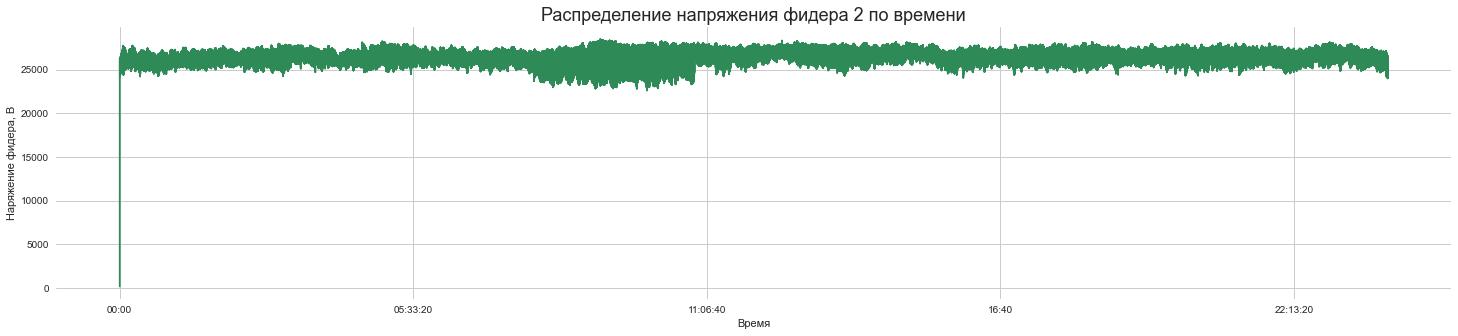

In [142]:
sns.set_style("whitegrid")
fks_2['voltage'].plot(figsize=(25, 5), color="seagreen")
plt.title("Распределение напряжения фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Наряжение фидера, В')
plt.show()

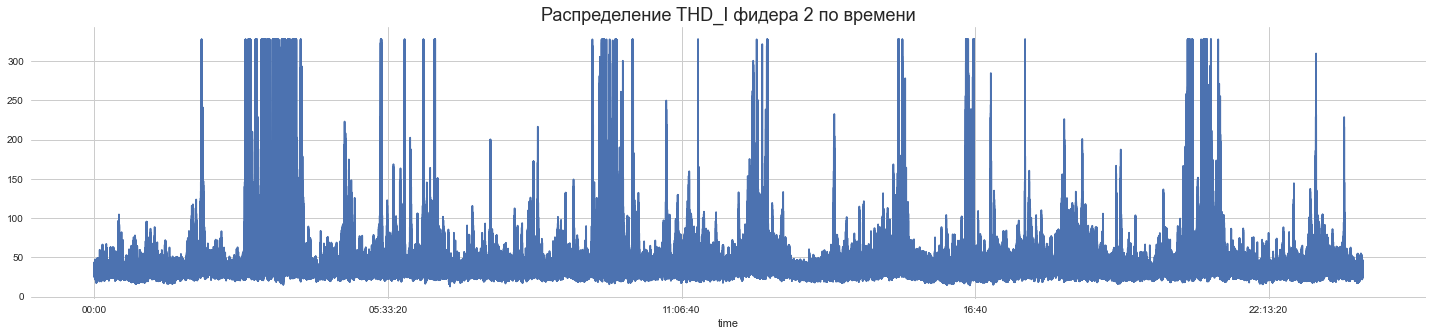

In [143]:
sns.set_style("whitegrid")
fks_2['THD_I'].plot(figsize=(25, 5))
plt.title("Распределение THD_I фидера 2 по времени", fontsize=18)
plt.show()

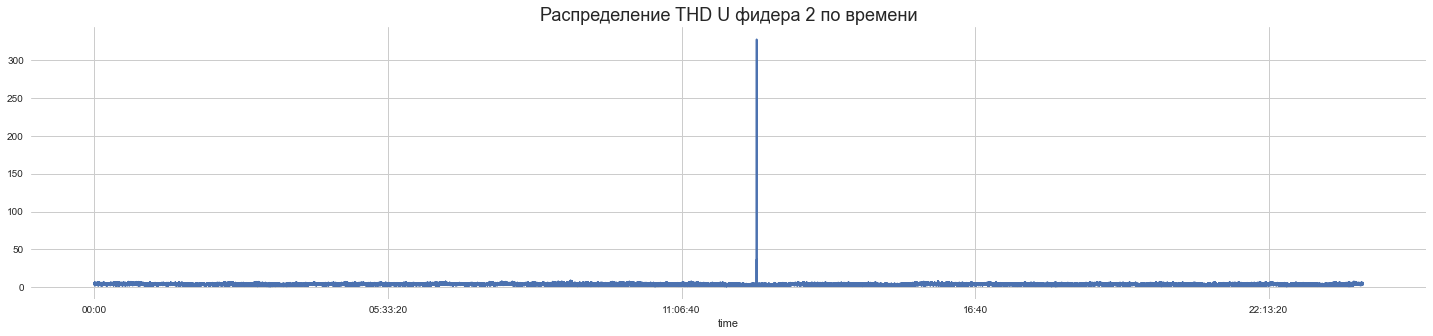

In [144]:
sns.set_style("whitegrid")
fks_2['THD_U'].plot(figsize=(25, 5))
plt.title("Распределение THD U фидера 2 по времени", fontsize=18)
plt.show()

### Распределение значений переменных

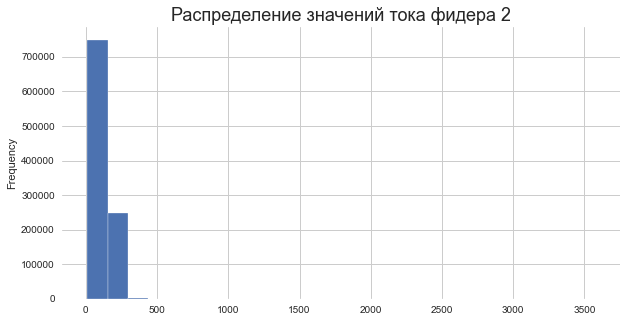

In [145]:
sns.set_style("whitegrid")
fks_2['current'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений тока фидера 2", fontsize=18)
plt.show()

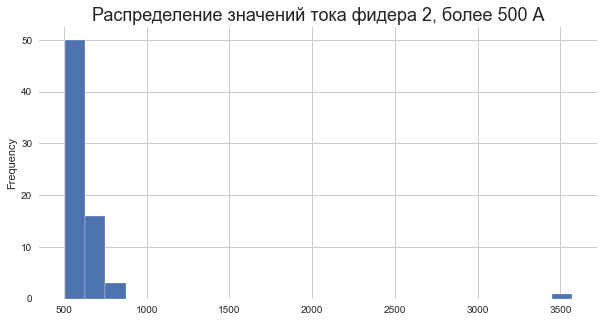

In [146]:
sns.set_style("whitegrid")
fks_2['current'][fks_2['current']>500].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений тока фидера 2, более 500 А", fontsize=18)
plt.show()

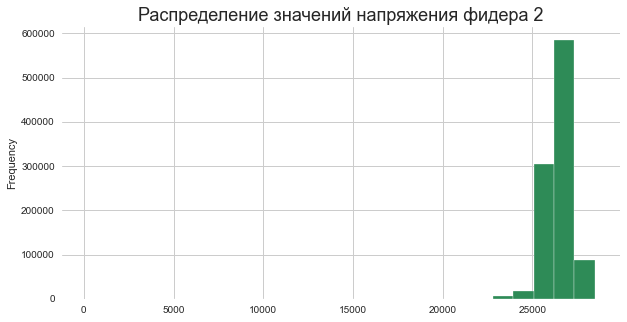

In [147]:
sns.set_style("whitegrid")
fks_2['voltage'].plot(figsize=(10, 5), kind='hist', bins=25, color="seagreen")
plt.title("Распределение значений напряжения фидера 2", fontsize=18)
plt.show()

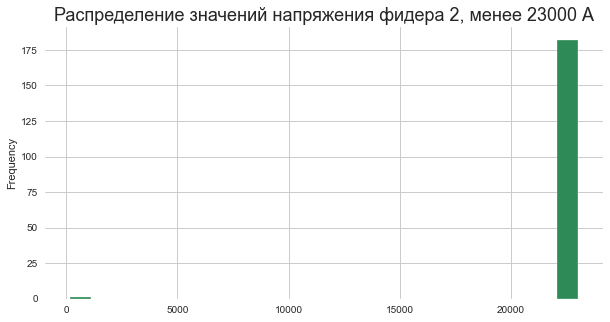

In [148]:
sns.set_style("whitegrid")
fks_2['voltage'][fks_2['voltage']<23000].plot(figsize=(10, 5), kind='hist', bins=25, color="seagreen")
plt.title("Распределение значений напряжения фидера 2, менее 23000 А", fontsize=18)
plt.show()

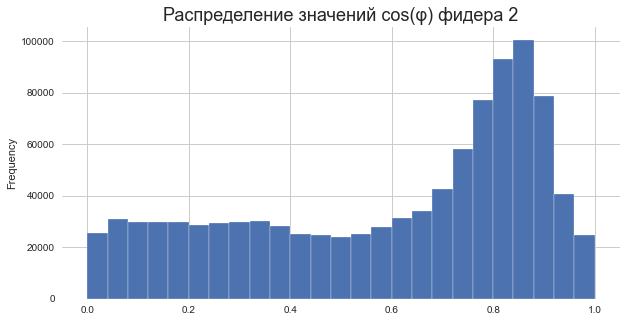

In [149]:
sns.set_style("whitegrid")
fks_2['cos(φ)'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений cos(φ) фидера 2", fontsize=18)
plt.show()

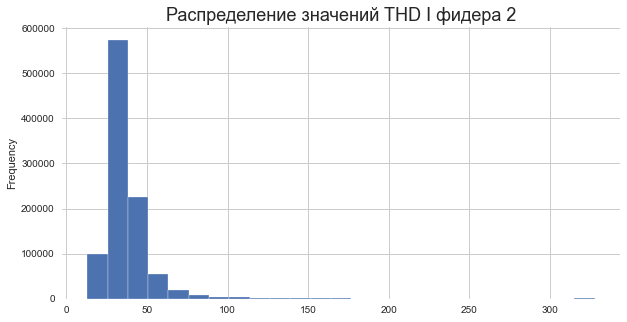

In [150]:
sns.set_style("whitegrid")
fks_2['THD_I'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений THD I фидера 2", fontsize=18)
plt.show()

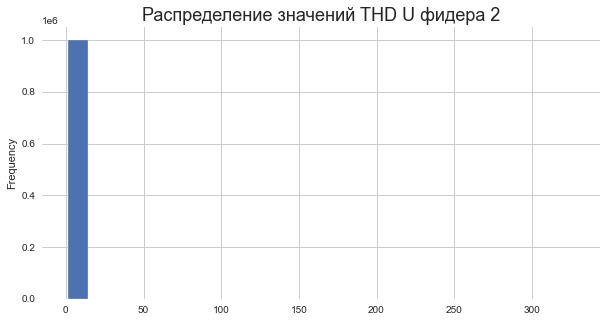

In [151]:
sns.set_style("whitegrid")
fks_2['THD_U'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений THD U фидера 2", fontsize=18)
plt.show()

### Взаимоотношения между переменными

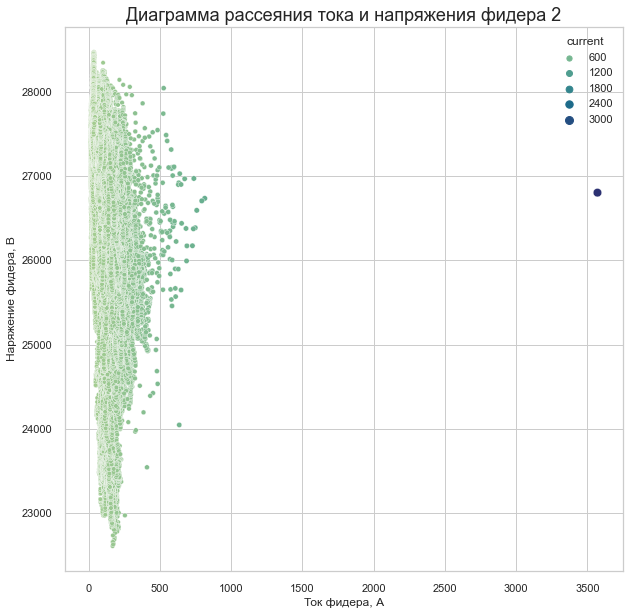

In [152]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['voltage'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и напряжения фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Наряжение фидера, В')
plt.show()

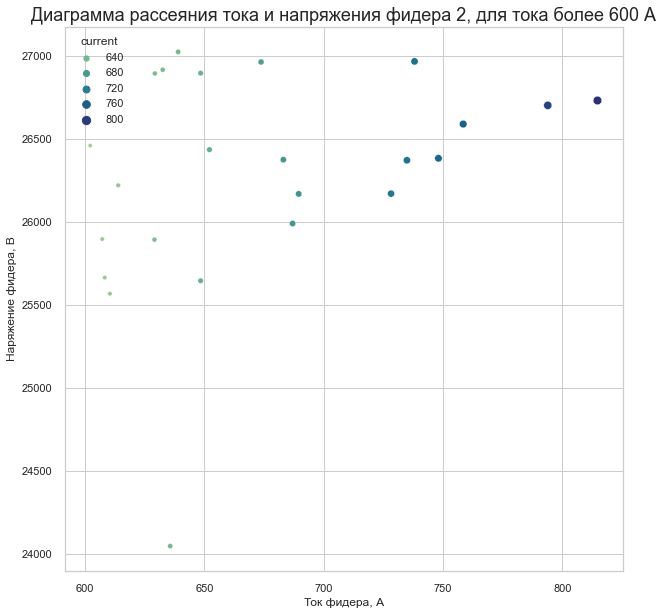

In [153]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_2.loc[(fks_2['current'] > 600) & (fks_2['current'] < 2000)]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['voltage'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и напряжения фидера 2, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Наряжение фидера, В')
plt.show()

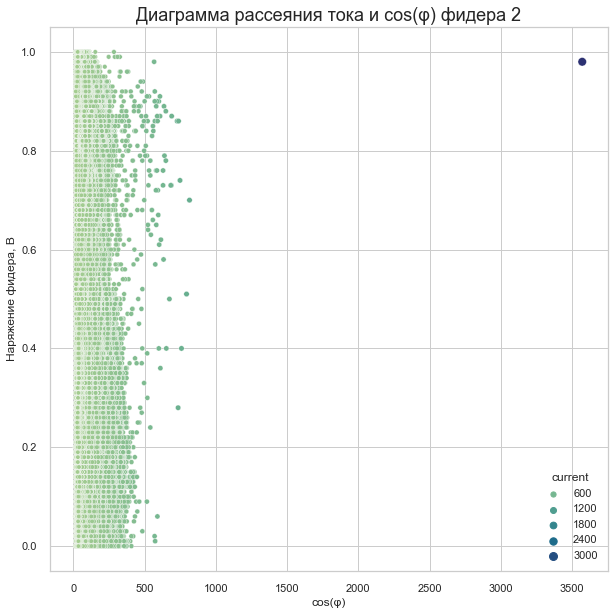

In [154]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['cos(φ)'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и cos(φ) фидера 2", fontsize=18)
plt.xlabel('cos(φ)')
plt.ylabel('Наряжение фидера, В')
plt.show()

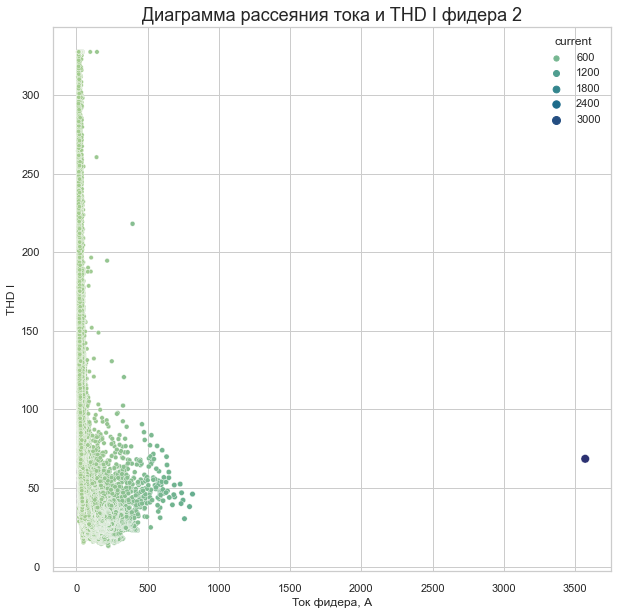

In [155]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['THD_I'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и THD I фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('THD I')
plt.show()

#### Расчетные значения

In [156]:
# Сопротивление фидера 2
fks_2['impedance'] = fks_2['voltage'] / fks_2['current']
fks_2['impedance'][:5]

time
07:50:14.767000    163.656365
07:50:15.767000    160.140068
07:50:16.767000    160.762862
07:50:17.767000    158.119217
07:50:18.767000    163.754276
Name: impedance, dtype: float64

In [157]:
fks_2['φ'] = np.rad2deg(np.arccos(fks_2['cos(φ)']))
fks_2['φ'][:5]

time
07:50:14.767000    25.841933
07:50:15.767000    25.841933
07:50:16.767000    24.494648
07:50:17.767000    24.494648
07:50:18.767000    25.841933
Name: φ, dtype: float64

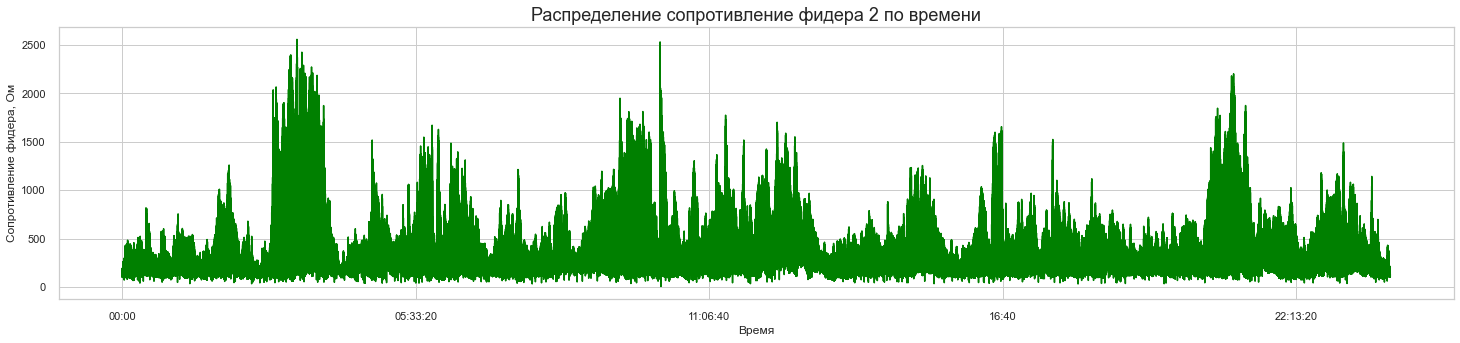

In [158]:
sns.set_style("whitegrid")
fks_2['impedance'].plot(figsize=(25, 5), color="green")
plt.title("Распределение cопротивление фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

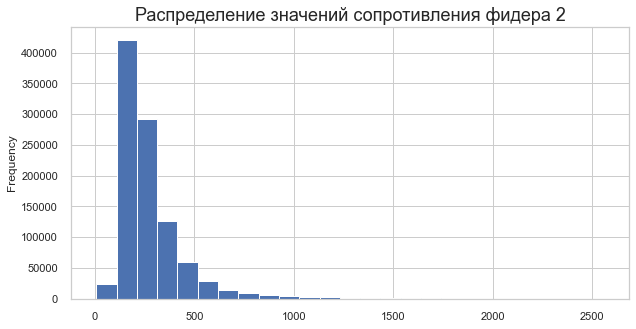

In [159]:
sns.set_style("whitegrid")
fks_2['impedance'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений сопротивления фидера 2", fontsize=18)
plt.show()

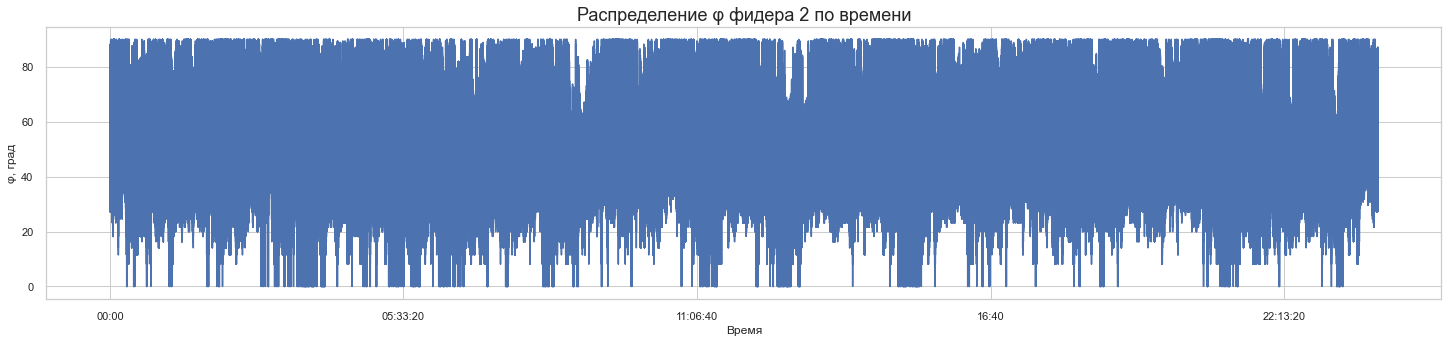

In [160]:
sns.set_style("whitegrid")
fks_2['φ'].plot(figsize=(25, 5))
plt.title("Распределение φ фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('φ, град')
plt.show()

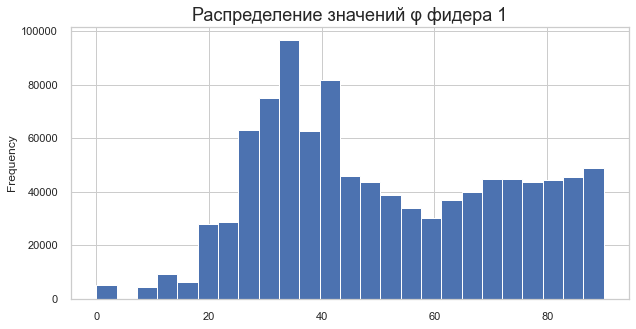

In [161]:
sns.set_style("whitegrid")
fks_2['φ'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений φ фидера 1", fontsize=18)
plt.show()

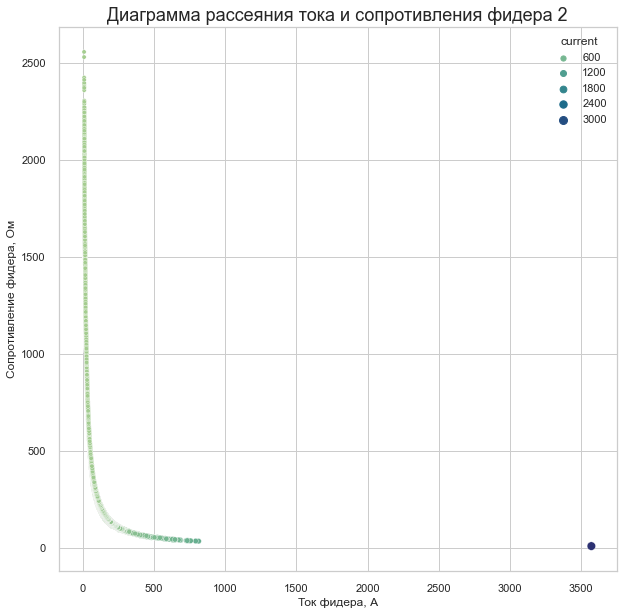

In [162]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и сопротивления фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

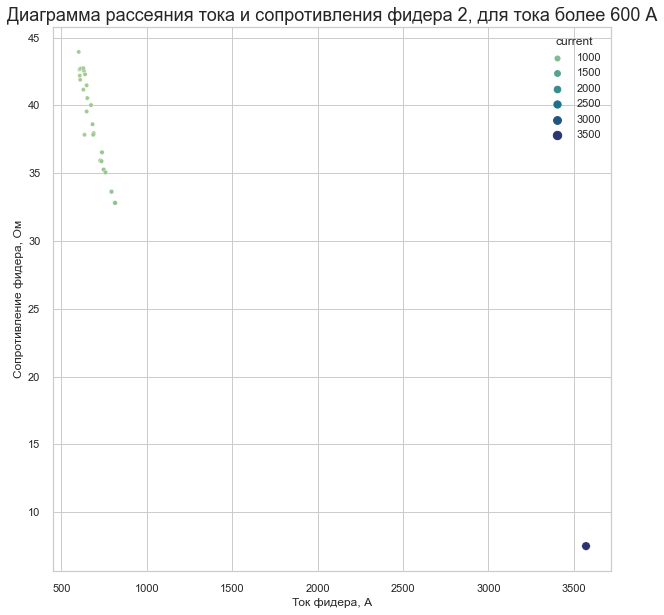

In [163]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_2.loc[fks_2['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и сопротивления фидера 2, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

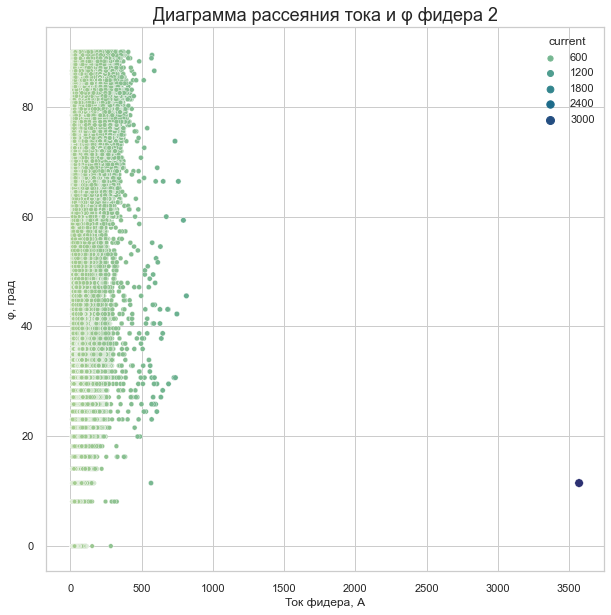

In [164]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['φ'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и φ фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('φ, град')
plt.show()

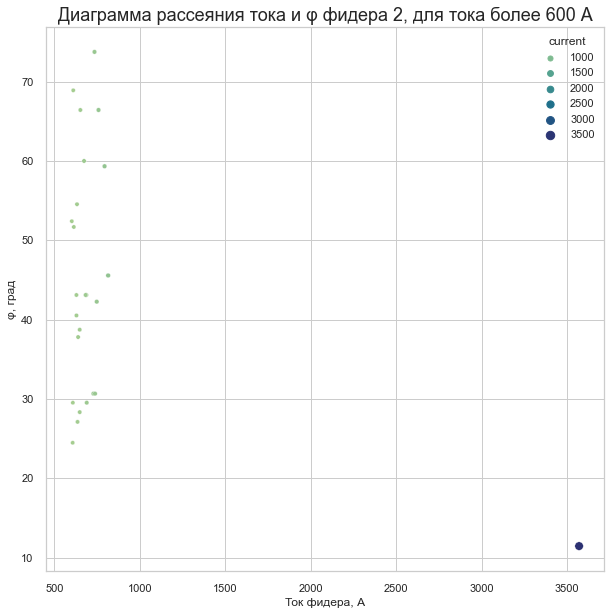

In [165]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_2.loc[fks_2['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['φ'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и φ фидера 2, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('φ, град')
plt.show()

## Комплексное сопростивление и его угол

In [166]:
fks_2['complex_impedance'] = fks_2['impedance'] * np.exp(1j * fks_2['φ'])
fks_2['complex_impedance'][:5]

time
07:50:14.767000    124.196952+106.576372j
07:50:15.767000    121.528474+104.286487j
07:50:16.767000     129.130083-95.760740j
07:50:17.767000     127.006619-94.186014j
07:50:18.767000    124.271256+106.640133j
Name: complex_impedance, dtype: complex128

In [167]:
# fks_2['φ_impedance'] = np.angle(fks_2['complex_impedance'], deg=True)
# fks_2['φ_impedance'][:5]

In [168]:
fks_2['φ_impedance'] =  np.absolute(np.rad2deg(np.real(np.arctan(fks_2['complex_impedance']))))

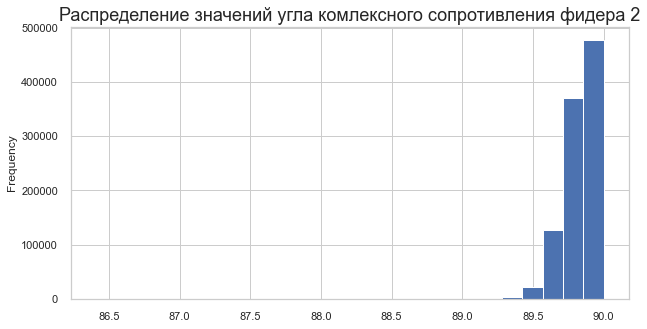

In [169]:
sns.set_style("whitegrid")
fks_2['φ_impedance'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений угла комлексного сопротивления фидера 2", fontsize=18)
plt.show()

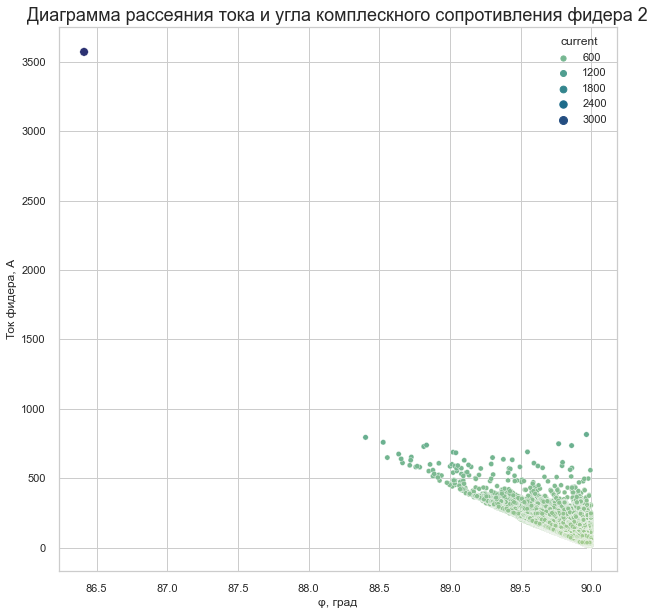

In [170]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                y=fks_2['current'],
                x=fks_2['φ_impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и угла комплескного сопротивления фидера 2", fontsize=18)
plt.ylabel('Ток фидера, А')
plt.xlabel('φ, град')
plt.show()

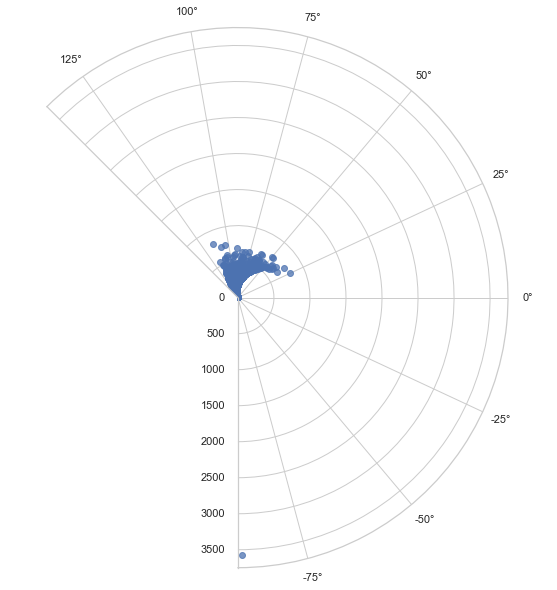

In [175]:
theta = fks_2['φ_impedance']
r= fks_2['current']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, alpha=0.75)

ax.set_thetamin(-90)
ax.set_thetamax(135)

plt.show()

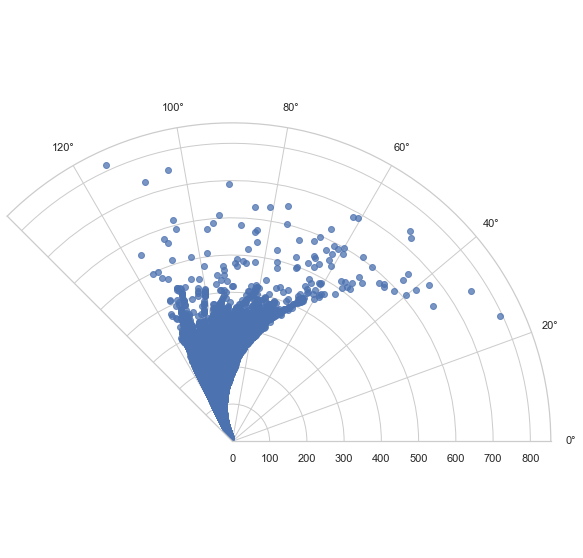

In [172]:
fks_data = fks_2.loc[fks_2['current'] < 2000]
theta = fks_data['φ_impedance']
r= fks_data['current']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, alpha=0.75)

ax.set_thetamin(0)
ax.set_thetamax(135)

plt.show()

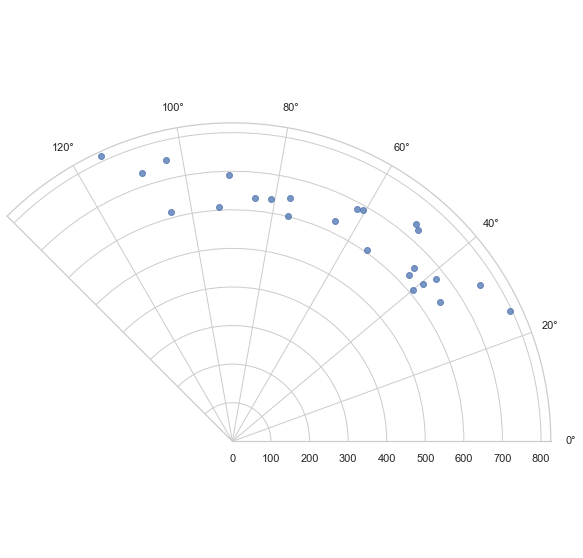

In [173]:
fks_data = fks_2.loc[(fks_2['current'] > 600) & (fks_2['current'] < 2000)]
theta = fks_data['φ_impedance']
r= fks_data['current']

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, alpha=0.75)

ax.set_thetamin(0)
ax.set_thetamax(135)

plt.show()